### 2D visualization of coil-20 images   

#### Import libraries  

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

#### Parameters  

In [9]:
csv_in = 'fashion-mnist_test1000.csv'
n_components = 2
n_neighbors = 10
n_obj = 20

#### Read CSV file  

In [10]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 6.0 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Standardization  

In [11]:
sc = StandardScaler()
X = sc.fit_transform(df) 

#### Manifold learning  

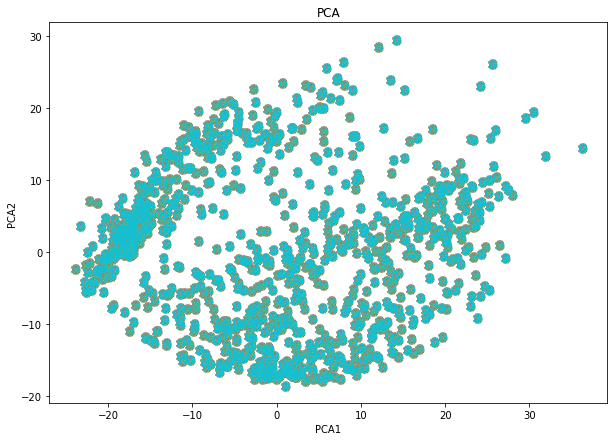

In [16]:
# PCA
Y = PCA(n_components=n_components).fit_transform(X)

plt.figure(figsize=(10,7))
plt.title("PCA")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

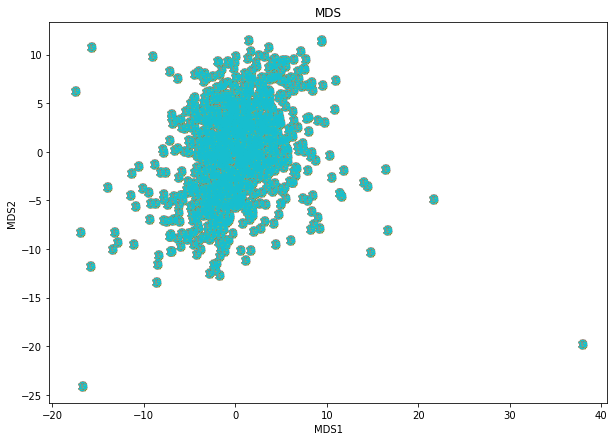

In [17]:
# MDS
Y = MDS(n_components=30, random_state=17).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("MDS")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()

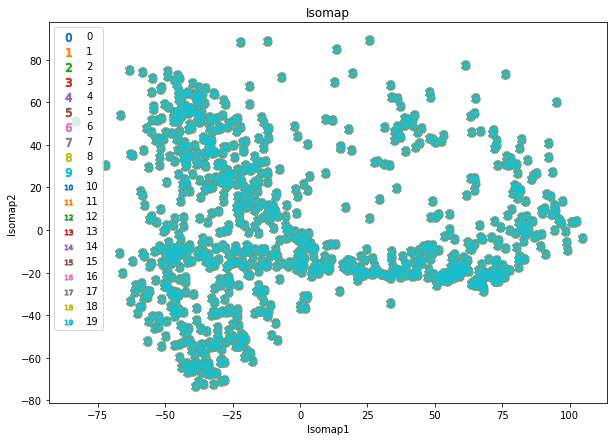

In [18]:
# Isomap
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("Isomap")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()
plt.show()

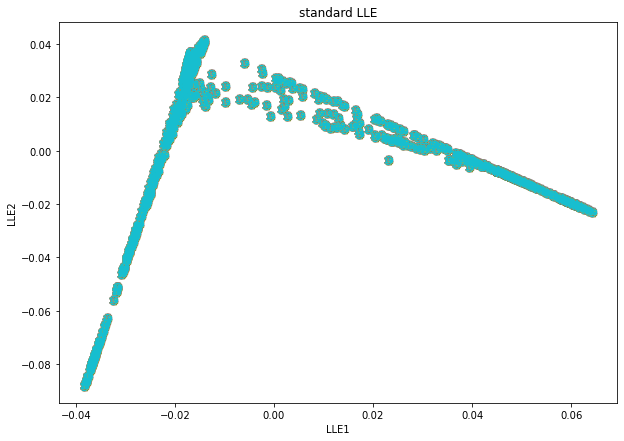

In [19]:
# LLE
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.show()

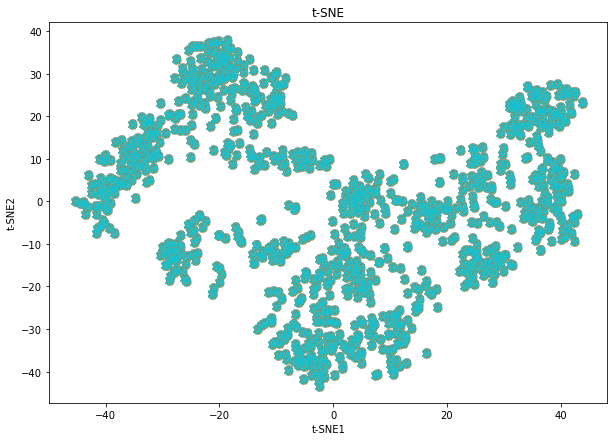

In [22]:
# t-SNE
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=17).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()